# Predicting Crash Severity for Seattle Car Collisions

BACKGROUND:

The number of traffic collisions and their victims has been a rising trend globally due to increases in population and motorization. In order to take necessary actions to control this ever-growing problem extensive research has been carried out into the prediction of traffic collisions in both developed and developing countries using various statistical techniques. Different factors involved in traffic collisions have a substantial effect on each other, thus making it difficult to individually consider any of the parameters when explaining the severity of traffic collisions. Realizing traffic accidents as a preventable problem developed countries have implemented different policies and measures to reduce this problem. These include enforcement, education, training and engineering improvements.

OBJECTIVE OF THIS PROJECT:

The main objective of the research is to investigate the role of factors in collision severity using Seattle Department Of Transportation data and predictive models. Our two specific objectives include:
1) Exploring the underlying variables such as human characteristics, vehicle characteristics,roadway characteristics, and environmental characteristics that impact collision severity.
2) Predicting collision severity using Decision Tree and Using Logistic Regression


DESCRIPTION OF THE DATASET:

Governments, states, provinces and municipalities collect and manage data for their internal operations. In the last decade, an open data movement has emerged that encourages governments to make the data they collect available to the public as “open data”. Open data is defined as “structured data that is machine-readable, freely shared, used and built on without restrictions. The data set used here is taken from the open data website of the Seattle City. It is published by the Seattle Department of Transportation. The dataset contains information about 194673 collisions, recorded between 2004-01-01 00:00:00 and 2020-05-20 00:00:00. The metadata for the same can be accessed through the following link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

APPROACH:

First of all, the data set will be analysed using data vizualisation tools and libraries in python to identify trends in collisions and parameters affecting the collisions. Then the data set will be modeled to predict collision severity. The data set mentions 2 levels of collision severity: 1- Property Damage Only Collision 2- Injury Collision The approach for modeling collision severity involves statistical modeling considering severity as a dependent variable while road coniditions, speeding, driver attention, influence of drugs/alcohol on driver, junction type where the collision occured and a few environmental factors as the independent variables.

ASSUMPTIONS:

A few of the columns in the data set contained categorical values, 'Y': Yes and NaN. It is assumed that the NaN values correspond to 'N':No. It is also assumed that the data values -'Other' and 'Unknown' correspond to Null as they tell us nothing about the features in the dataset.

## The Data Set

In [156]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
path = 'C:\\Users\\alway\\Desktop\\Data-Collisions.csv'
seattle_df = pd.read_csv(path, low_memory= False)
seattle_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [157]:
path = "C:\\Users\\alway\\Desktop\\Data-Collisions.csv"
seattle_df = pd.read_csv(path)
seattle_df.head()

C:\Users\alway\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Lets look at the column wise summary of the Data Set:

In [158]:
print('Total Number of Collisions in Database: {}'.format(seattle_df.shape[0]))

Total Number of Collisions in Database: 194673


Records are between 1/1/2004 and 9/9/2019 9:27:00 AM

In [159]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [160]:
#Converting the Data Type of the date and time of the incident column 
seattle_df['INCDTTM'] = pd.to_datetime(seattle_df['INCDTTM'])

The Seattle Department of Transportation has categorized the types of collisions into 62 categories. Let us look at some of the most frequent types of collisions

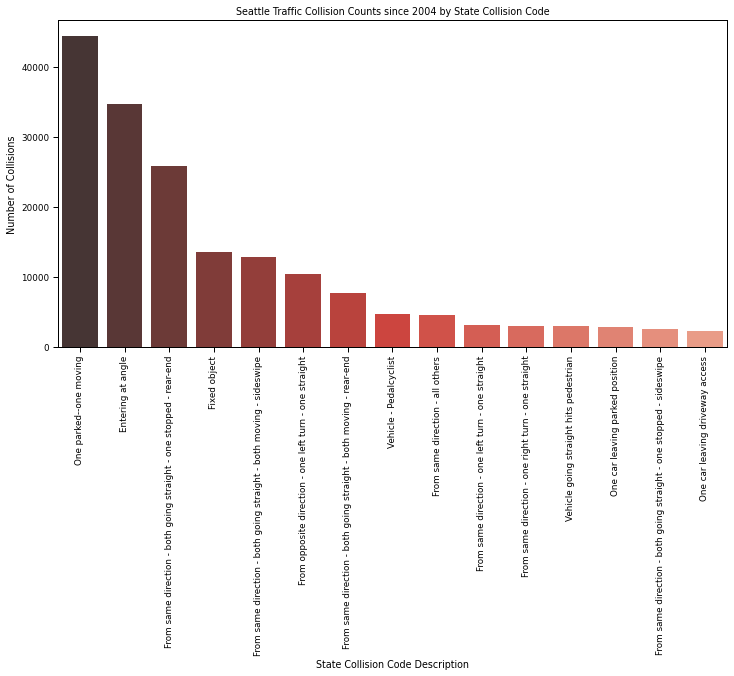

In [161]:
# Creating Dateframe using the State Collision Code value counts to identify the frequency of the type of collisions in the Seattle City
stcc_df = pd.DataFrame(seattle_df['ST_COLDESC'].value_counts())
stcc_top = stcc_df.iloc[:15] # Limit our output to top 15 results

# Barplot
plt.figure(figsize=(12,6))
ax1 = sns.barplot(data=stcc_top, x=stcc_top.index, y='ST_COLDESC', palette=("Reds_d"))

# Formatting
sns.set_context("paper")
plt.title('Seattle Traffic Collision Counts since 2004 by State Collision Code')
plt.xlabel('State Collision Code Description')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=90)
plt.show()

We see that the most frequent category is where one vehicle is parked and one is moving followed by another category which is where the vehicle is entering at an angle. Another category that must be considered is when both the vehicles are going in the same direction and one of the vehicles stops suddenly and the other vehicle hits the former's rear end. Inferences: These categories suggest that the main causes of collision are driver's inattention or speeding or the driver being under influence of drugs/alcohol.

Now we will plot the collision severity to identify the number of collisions in the 2 severity categories

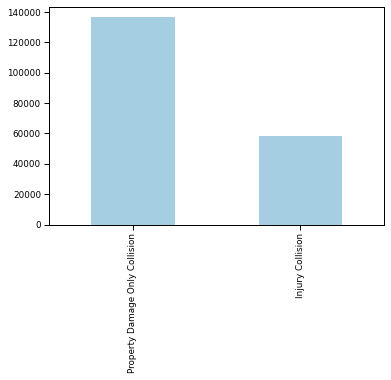

In [162]:
seattle_df['SEVERITYDESC'].value_counts().plot(kind='bar', colormap='Paired')

Now let us plot the INATTENTIONIND variable to identify the number of collisions caused by driver's inattention

INATTENTIONIND: 
 0    164868
1     29805
Name: INATTENTIONIND, dtype: int64 



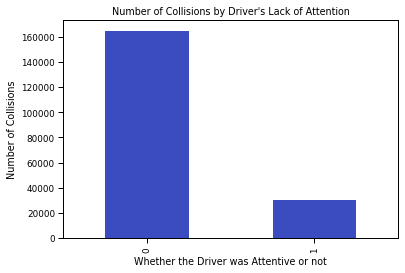

In [163]:
seattle_df['INATTENTIONIND'].replace("Y","1",inplace=True)
seattle_df['INATTENTIONIND'] = seattle_df['INATTENTIONIND'].replace(np.nan, 0)
seattle_df['INATTENTIONIND'].value_counts().plot(kind='bar', colormap='coolwarm')
plt.xlabel("Whether the Driver was Attentive or not")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Driver's Lack of Attention")
print('INATTENTIONIND:','\n',seattle_df['INATTENTIONIND'].value_counts(),'\n')


We see that over 70% of the collisions that occured in the Seattle city were due to Driver's lack of Attention, which is alarming!

We now look at the Number of collisions caused by speeding of the vehicle:

SPEEDING: 
 0    185340
1      9333
Name: SPEEDING, dtype: int64


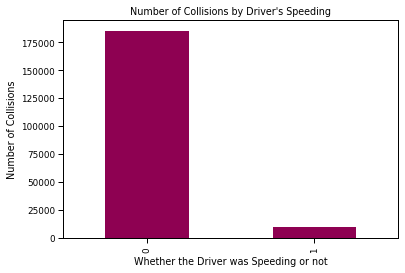

In [164]:
seattle_df['SPEEDING'].replace("Y","1",inplace=True)
seattle_df['SPEEDING'] = seattle_df['SPEEDING'].replace(np.nan, 0)
seattle_df['SPEEDING'].value_counts().plot(kind='bar',colormap='PiYG')
plt.xlabel("Whether the Driver was Speeding or not")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Driver's Speeding")
print('SPEEDING:','\n',seattle_df['SPEEDING'].value_counts())

It is seen that speeding is not the major factor leading to collisions, however it is still significant enough to be considered in decision making by the government authorities.

Every state provides the pedestrian with some form of right of way to cross the street in a crosswalk. So, whether the pedestrian's right of way was granted by the driver or not becomes an important factor in identifying the cause of collisions

PEDROWNOTGRNT: 
 0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64


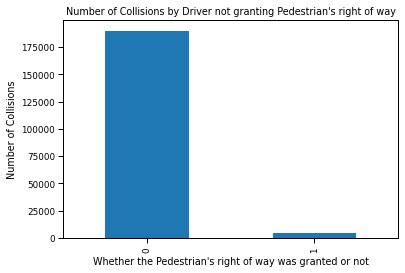

In [165]:
seattle_df['PEDROWNOTGRNT'].replace("Y","1",inplace=True)
seattle_df['PEDROWNOTGRNT'] = seattle_df['PEDROWNOTGRNT'].replace(np.nan, 0)
seattle_df['PEDROWNOTGRNT'].value_counts().plot(kind='bar')
plt.xlabel("Whether the Pedestrian's right of way was granted or not")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Driver not granting Pedestrian's right of way")
print('PEDROWNOTGRNT:','\n',seattle_df['PEDROWNOTGRNT'].value_counts())

Hence, even though the state provides pedestrians right of way, the drivers tend to overlook which, as can be seen in the plot above, is causing collisions.

Drink and drive is a serious offence and has been one of the major factors causing collisions leading to property damage and fatalities. It is important to consider whether the driver was under the influence of drugs or alcohol when the collision took place.

UNDERINFL: 
 0    180668
1      9121
Name: UNDERINFL, dtype: int64


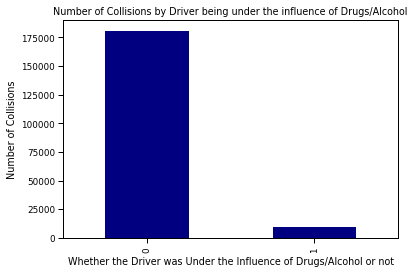

In [166]:
seattle_df['UNDERINFL'].replace("Y","1",inplace=True)
seattle_df['UNDERINFL'].replace("N","0",inplace=True)
seattle_df['UNDERINFL'].value_counts().plot(kind='bar',colormap='jet')
plt.xlabel("Whether the Driver was Under the Influence of Drugs/Alcohol or not")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Driver being under the influence of Drugs/Alcohol")
print('UNDERINFL:','\n',seattle_df['UNDERINFL'].value_counts())

JUNCTIONTYPE: 
 Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Name: JUNCTIONTYPE, dtype: int64


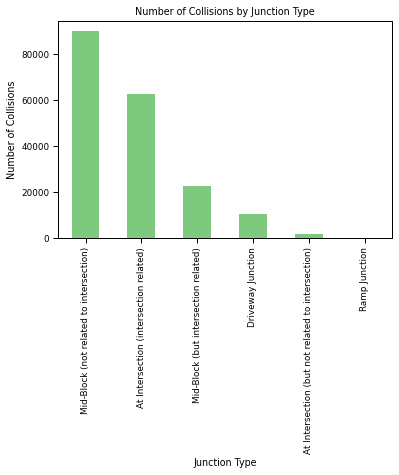

In [167]:
seattle_df=seattle_df[seattle_df.JUNCTIONTYPE != 'Unknown']
seattle_df['JUNCTIONTYPE'].value_counts().plot(kind='bar', colormap='Accent')
plt.xlabel("Junction Type")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions by Junction Type")
print('JUNCTIONTYPE:','\n',seattle_df['JUNCTIONTYPE'].value_counts())

It can be seen that the number of collisions that take place at the intersection of roads or intersection related collisions are more than those not related to intersections. This information can be used to frame rules specifically for the intersections.

We will now clean our data further, to discard a few of the columns which will not be used in the further analysis of our data set. Columns containing codes or unique identifiers, duplicate columns and a few ambiguous columns are discarded. Moreover, some of the columns are renamed

In [168]:
seattle_df=seattle_df.drop(columns=['ST_COLDESC','OBJECTID','VEHCOUNT','REPORTNO','STATUS','SEVERITYCODE.1','EXCEPTRSNCODE','EXCEPTRSNDESC','INCKEY','COLDETKEY', 'INTKEY', 'SDOTCOLNUM','ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)
seattle_df=seattle_df.rename(columns = {'ADDRTYPE':'COLLISIONADDRESS', 'ROADCOND':'ROADCONDITION', 'LIGHTCOND':'LIGHTCONDITION','UNDERINFL':'UNDERINFLUENCE','INATTENTIONIND':'INATTENTION'})
seattle_df.head()

,SEVERITYCODE,X,Y,COLLISIONADDRESS,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,INATTENTION,UNDERINFLUENCE,WEATHER,ROADCONDITION,LIGHTCONDITION,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,N


As seen in the dataframe's info output, a few of the columns contain null values, let us look at the number of null values per column.

In [169]:
seattle_df.isnull().sum()

SEVERITYCODE           0
X                   5331
Y                   5331
COLLISIONADDRESS    1923
LOCATION            2674
SEVERITYDESC           0
COLLISIONTYPE       4902
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTION            0
UNDERINFLUENCE      4882
WEATHER             5079
ROADCONDITION       5010
LIGHTCONDITION      5168
PEDROWNOTGRNT          0
SPEEDING               0
HITPARKEDCAR           0
dtype: int64

In [170]:
seattle_df = seattle_df.dropna()
seattle_df=seattle_df[seattle_df.ROADCONDITION != 'Other']
seattle_df=seattle_df[seattle_df.ROADCONDITION != 'Unknown']
seattle_df=seattle_df[seattle_df.WEATHER != 'Other']
seattle_df=seattle_df[seattle_df.WEATHER != 'Unknown']
seattle_df.isnull().sum()
seattle_df.shape

(166972, 23)

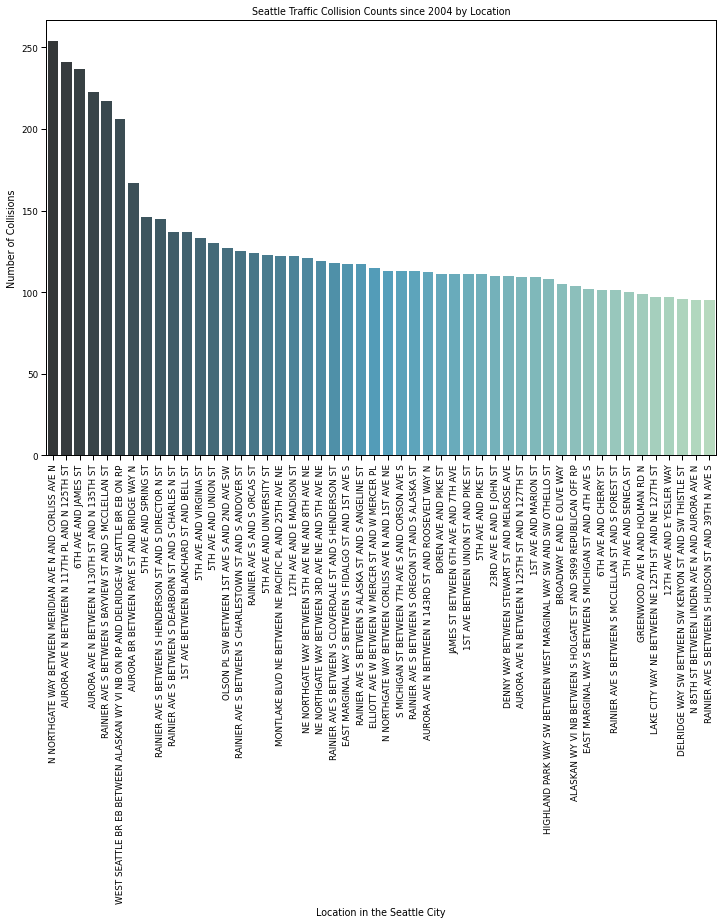

In [171]:
# Creating Dataframe using the State Collision Code value counts to identify the frequency of the type of collisions in the Seattle City
Location_df = pd.DataFrame(seattle_df['LOCATION'].value_counts())
Location_top = Location_df.iloc[:50] # Limit our output to top 50 results

# Barplot
plt.figure(figsize=(12,8))
ax1 = sns.barplot(data=Location_top, x=Location_top.index, y='LOCATION', palette=("GnBu_d"))

# Formatting
sns.set_context("paper")
plt.title('Seattle Traffic Collision Counts since 2004 by Location')
plt.xlabel('Location in the Seattle City')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=90)
plt.show()

In [172]:
!pip install folium==0.5.0

In [173]:
import folium
from folium.plugins import HeatMap
# Create basic Folium collision map
collision_map= folium.Map(location=[47.6062, -122.3321], zoom_start=11)
collision_map
limit = 500
df_collisions = seattle_df.iloc[0:limit, :]
collisions = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_collisions.Y, df_collisions.X):
    collisions.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
collision_map.add_child(collisions)

The barplot of the collisions numbers by location and their markings on the world map suggest that the location that is the most prone to collisions is the Downtown Seattle.

The data set contains collisions leading property damage and property damage with injuries. We will now take subset of our original dataset to identify the number of people injured per collision and the most frequent number of victims.


<ipython-input-174-bed7ba5ef5e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Injured['victim']=Injured['PERSONCOUNT']+Injured['PEDCYLCOUNT']+Injured['PEDCOUNT']


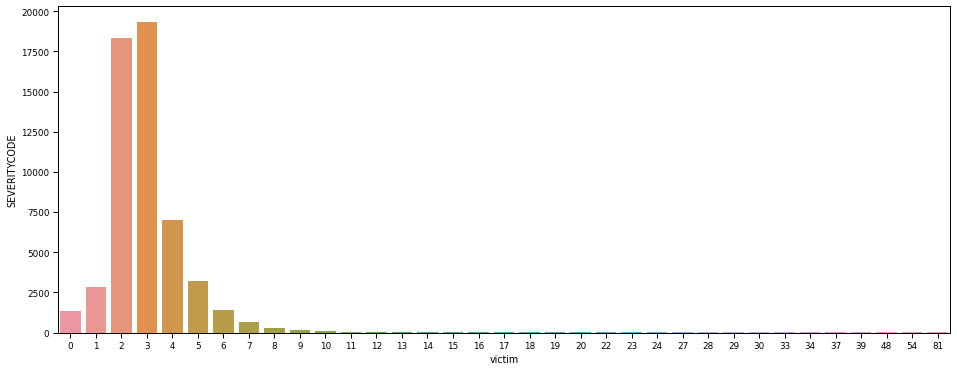

In [174]:
Injured = seattle_df[seattle_df["SEVERITYCODE"] > 1]

Injured['victim']=Injured['PERSONCOUNT']+Injured['PEDCYLCOUNT']+Injured['PEDCOUNT']
grouped = Injured.groupby(['victim']).count()
plt.figure(figsize=(16,6))
sns.barplot(x=grouped.index,y=grouped['SEVERITYCODE'])


It can be seen that in general, 2-3 people are injured during severe collisions.

In [175]:
seattle_df=seattle_df.drop(columns=['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','LOCATION'])

Looking at the time periods at which the highest number of collisions occured:

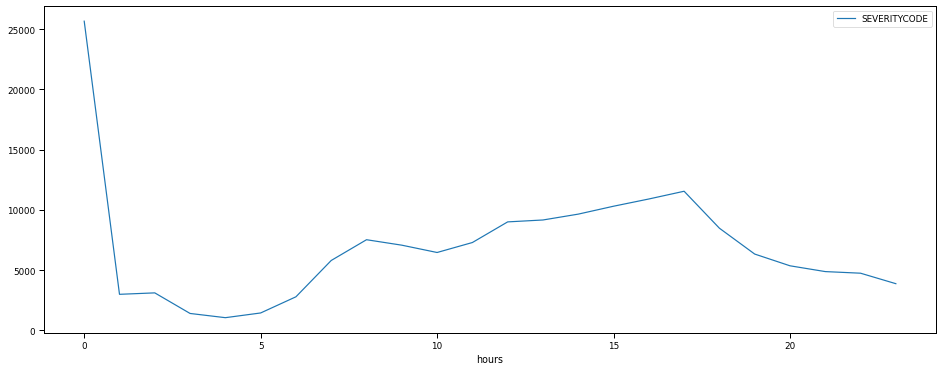

In [176]:
seattle_df['hours'] = seattle_df['INCDTTM'].dt.hour
subseattle= seattle_df[['hours','SEVERITYCODE']]
grouped = subseattle.groupby(['hours']).count()
plt.figure(figsize=(16,6))
h=sns.lineplot(data=grouped)

Surprisingly, most of the collisions occured around the midnight. Other time periods when the number of collisions is high are the office and lunch hours i.e., in the morning around 9am, during lunch hours around 1-2pm and in the evening around 6pm.

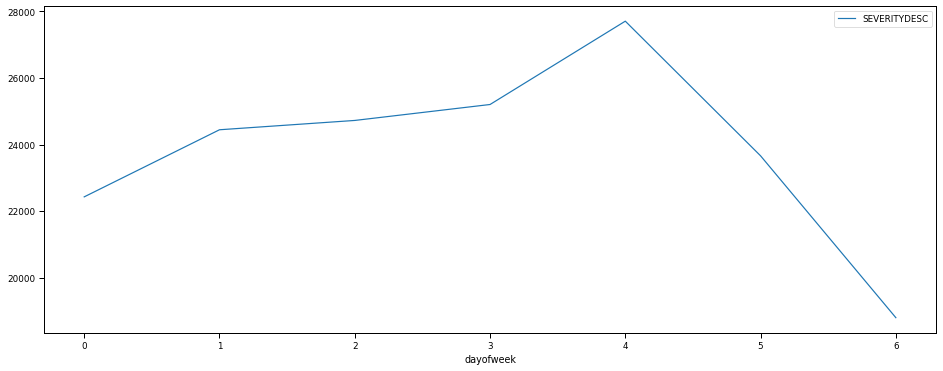

In [177]:
seattle_df['dayofweek'] = seattle_df['INCDTTM'].dt.dayofweek
subseattle= seattle_df[['dayofweek','SEVERITYDESC']]
grouped = subseattle.groupby(['dayofweek']).count()
plt.figure(figsize=(16,6))
sns.lineplot(data=grouped)

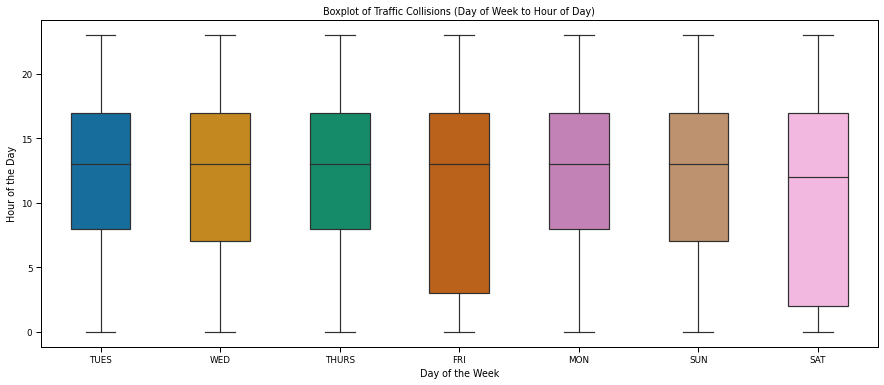

In [178]:
plt.figure(figsize=(15,6))
day_dict = {0:'SUN', 1:'MON', 2:'TUES', 3:'WED', 4:'THURS', 5:'FRI', 6:'SAT'}
seattle_df['day_of_week_name'] = seattle_df['dayofweek'].map(day_dict)
day_time_bplot = sns.boxplot(y='hours', x='day_of_week_name', data=seattle_df, width=0.5, palette='colorblind')
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Boxplot of Traffic Collisions (Day of Week to Hour of Day)")
plt.show()


In the plot above, 0 : Monday 1 : Tuesday 2 : Wednesday 3 : Thursday 4 : Friday 5 : Saturday 6 : Sunday

Combining the day of week and the time when the number of collisions are high suggests that the highest number of collisions happen on Friday nights.

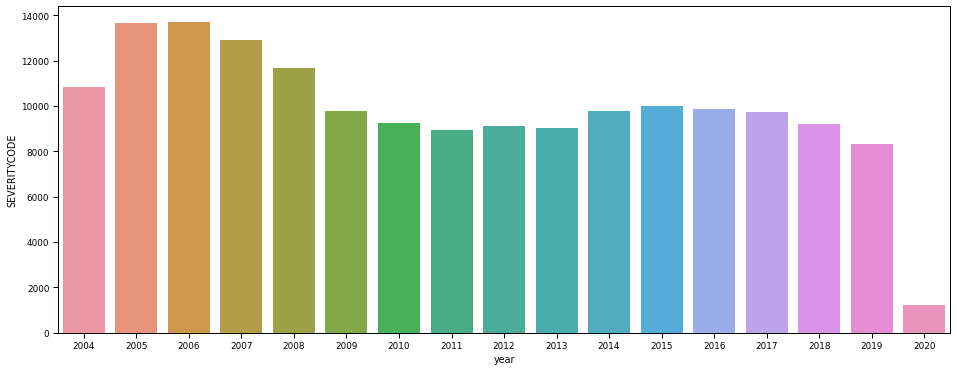

In [179]:
#year on year trend for the number of collisions
seattle_df['year'] = pd.DatetimeIndex(seattle_df['INCDTTM']).year
yearseattle= seattle_df[['year','SEVERITYCODE']]
grouped1 = yearseattle.groupby(['year']).count()
plt.figure(figsize=(16,6))
sns.barplot(x=grouped1.index,y=grouped1['SEVERITYCODE'])

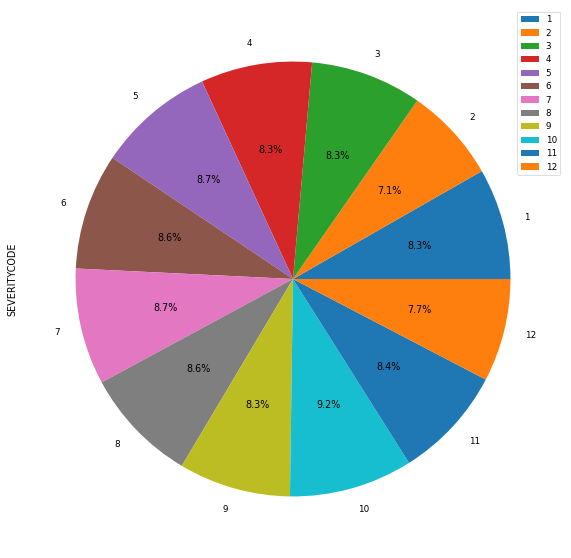

In [180]:
#Monthly trend for the number of collisions
seattle_df['month'] = pd.DatetimeIndex(seattle_df['INCDTTM']).month
seattle_df.groupby(['month']).sum().plot(kind='pie', y='SEVERITYCODE',figsize=(15,10),autopct='%1.1f%%')


The condition of the road is another parameter that must be considered for the collisions:

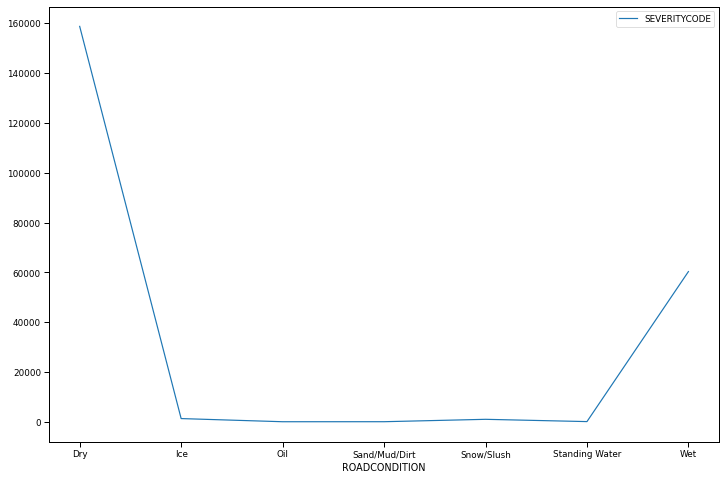

In [181]:
seattle_df.groupby(['ROADCONDITION']).sum().plot(kind='line', y='SEVERITYCODE',figsize=(12,8))

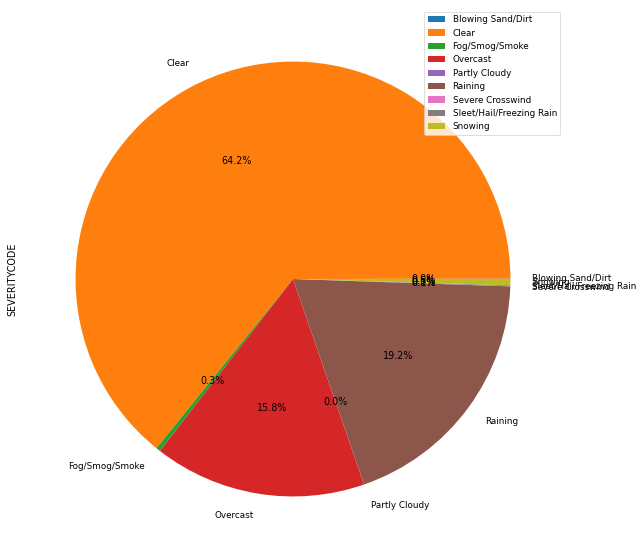

In [182]:
#Percentage of Collisions by Weather 
seattle_df.groupby(['WEATHER']).sum().plot(kind='pie', y='SEVERITYCODE',figsize=(15,10),autopct='%1.1f%%')

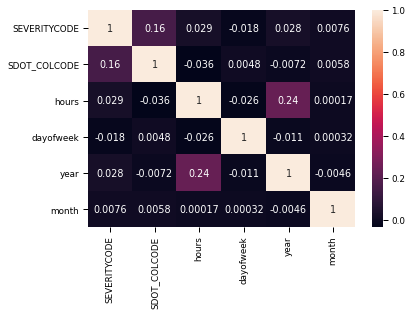

In [183]:
corrMatrix = seattle_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [184]:
seattle_df = seattle_df.astype(str)

# MODELING THE DATA

For modeling, we will consider the features such as Collision Address, Collision Type, Weather, Road Condition, Light condition, Speeding, whether the driver was in attention or not, whether the driver was under the influence of Drugs/Alcohol or not, whether the Pedestrians' right of way was granted or not, state collision code. Features in the data set are categorical, hence, we need to convert them to ordinal values using One Hot Encoding Method.

In [185]:
Feature = seattle_df[['COLLISIONTYPE','UNDERINFLUENCE','JUNCTIONTYPE','INATTENTION','WEATHER','ROADCONDITION','LIGHTCONDITION','SPEEDING']]
Feature = pd.concat([seattle_df.SDOT_COLCODE,pd.get_dummies(Feature)], axis=1)
Feature.head()
X=Feature
X[0:5]

,SDOT_COLCODE,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,...,LIGHTCONDITION_Dark - Street Lights Off,LIGHTCONDITION_Dark - Street Lights On,LIGHTCONDITION_Dark - Unknown Lighting,LIGHTCONDITION_Dawn,LIGHTCONDITION_Daylight,LIGHTCONDITION_Dusk,LIGHTCONDITION_Other,LIGHTCONDITION_Unknown,SPEEDING_0,SPEEDING_1
0,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,16,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0



The Target Variable, SEVERITYCODE

In [186]:
y = seattle_df['SEVERITYCODE'].values
y[0:5]

array(['2', '1', '1', '1', '2'], dtype=object)

DIVIDING THE DATA SET INTO TRAINING AND TESTING DATASETS:

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=4)
print("Training sets:","\n", "X_train:", X_train.shape,"\n", "y_train:", y_train.shape)
print("Testing sets:","\n", "X_test:", X_test.shape,"\n", "y_test:", y_test.shape)

Training sets: 
 X_train: (108531, 48) 
 y_train: (108531,)
Testing sets: 
 X_test: (58441, 48) 
 y_test: (58441,)



DECISION TREE:

In [188]:
from sklearn.tree import DecisionTreeClassifier
SS_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SS_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [202]:
from sklearn.metrics import jaccard_score
Predict_SS = SS_DT.predict(X_test)
print ("SEVERITY SCORE Predicted using Decision Tree:","\n",Predict_SS[0:5])
print ("Test set SEVERITY SCORE","\n", y_test[0:5])

#Accuracy of the Model:

Jaccard_Index = jaccard_score(y_test, Predict_SS)
print("Jaccard Index for SEVERITY SCORE:",round(Jaccard_Index,2))

SEVERITY SCORE Predicted using Decision Tree: 
 ['1' '1' '1' '1' '2']
Test set SEVERITY SCORE 
 ['1' '1' '1' '2' '2']


C:\Users\alway\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['1', '2'], dtype='<U1')

In [204]:
importance = SS_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01500
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.16728
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04121
Feature: 6, Score: 0.40572
Feature: 7, Score: 0.20580
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01337
Feature: 10, Score: 0.11892
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01480
Feature: 13, Score: 0.00008
Feature: 14, Score: 0.00037
Feature: 15, Score: 0.00008
Feature: 16, Score: 0.00038
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00314
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00023
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00022
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00022
Feature: 30, Score: 0.00056
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe


As we can see above, most of the coefficient values are insignificant, hence it is safe to assume that the features corresponding to those coefficients do not contribute in predicting the severity of the collisions. Let us model our data using only the features with significant values of coefficients and check if the accuracy of the model is affected or not.

In [205]:
Feature = seattle_df[['COLLISIONTYPE','UNDERINFLUENCE']]
Feature = pd.concat([seattle_df.SDOT_COLCODE,pd.get_dummies(Feature)], axis=1)
Feature.head()
X=Feature
X[0:5]

,SDOT_COLCODE,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,UNDERINFLUENCE_0,UNDERINFLUENCE_1
0,11,1,0,0,0,0,0,0,0,0,0,1,0
1,16,0,0,0,0,0,0,0,0,0,1,1,0
2,14,0,0,0,0,0,1,0,0,0,0,1,0
3,11,0,0,0,0,1,0,0,0,0,0,1,0
4,11,1,0,0,0,0,0,0,0,0,0,1,0


In [207]:
y = seattle_df['SEVERITYCODE'].values
y[0:5]

array(['2', '1', '1', '1', '2'], dtype=object)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=4)
print("Training sets:","\n", "X_train:", X_train.shape,"\n", "y_train:", y_train.shape)
print("Testing sets:","\n", "X_test:", X_test.shape,"\n", "y_test:", y_test.shape)

Training sets: 
 X_train: (108531, 13) 
 y_train: (108531,)
Testing sets: 
 X_test: (58441, 13) 
 y_test: (58441,)


In [209]:

from sklearn.tree import DecisionTreeClassifier
SS_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SS_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [222]:
from sklearn.metrics import jaccard_score
Predict_SS = SS_DT.predict(X_test)
print ("SEVERITY SCORE Predicted using Decision Tree:","\n",Predict_SS[0:5])
print ("Test set SEVERITY SCORE","\n", y_test[0:5])

#Accuracy of the Model:

Jaccard_Index = jaccard_score(y_test, Predict_SS)
print("Jaccard Index for SEVERITY SCORE:", round(Jaccard_Index, 2))

SEVERITY SCORE Predicted using Decision Tree: 
 ['1' '1' '1' '1' '2']
Test set SEVERITY SCORE 
 ['1' '1' '1' '2' '2']


In [212]:
importance = SS_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02578
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.16839
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04148
Feature: 6, Score: 0.40841
Feature: 7, Score: 0.20716
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01346
Feature: 10, Score: 0.11971
Feature: 11, Score: 0.01446
Feature: 12, Score: 0.00114


In [213]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, Predict_SS))
print(classification_report(y_test, Predict_SS))

[[38650   489]
 [15506  3796]]
              precision    recall  f1-score   support

           1       0.71      0.99      0.83     39139
           2       0.89      0.20      0.32     19302

    accuracy                           0.73     58441
   macro avg       0.80      0.59      0.58     58441
weighted avg       0.77      0.73      0.66     58441



<Figure size 432x288 with 0 Axes>

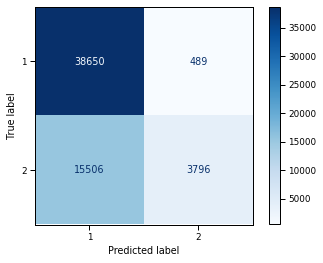

In [214]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix using the provided functions.

plt.figure()
plot_confusion_matrix(SS_DT,X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('dt_confusion_matrix.png')
plt.show();

In [215]:
from sklearn.linear_model import LogisticRegression
SS_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
SS_LR

LogisticRegression(C=0.01, solver='liblinear')

In [216]:
SSlr = SS_LR.predict(X_test)
SSlr
SS_prob = SS_LR.predict_proba(X_test)
SS_prob[0:5]

array([[0.91843534, 0.08156466],
       [0.91590494, 0.08409506],
       [0.91717893, 0.08282107],
       [0.71940908, 0.28059092],
       [0.09927214, 0.90072786]])

In [221]:
Jaccard_Index = jaccard_score(y_test, SSlr)
print("Jaccard Index for SEVERITY SCORE:", round(Jaccard_Index, 2))

Jaccard Index for SEVERITY SCORE: 0.73

RESULT:We see that both of our classification models can predict the severity of the collision upto an accuracy of 73% given the independent features.

### DISCUSSION:
Hence, we see that the major parameters that contribute towards predicting severity of a collision are the collision type and the parameter identifying whether the driver was under influence of drugs/alcohol or not. Other than that, the Seattle Department of Transportation Code which classifies the collisions into various collision categories also helps in predicting the collision severity. Actually, what can be seen is the parameters defining the details of collisions are mainly important for predicting the severity of collision. I believe that the parameters relating to roadcondition, speeding, light condition, weather, junction type etc. can better be used for predicting whether a collision is likely to happen or not; whereas for predicitng the collision severity, the type and number of vehicles, the angle at which the vehicle collided with another vehicle or person are the most pronounced parameters



### CONCLUSION:

Road traffic accident constitutes a serious problem and prediction of its magnitude using reliable approaches has become a necessity. An accident prediction model was developed using two classification algorithms through analyzing the relationship between accidents and parameters affecting them for which data were available. In this project, I collected and cleaned traffic collision data, attempted to construct novel attributes, and tested a number of predictive models.